# Import

In [2]:
import os
import sys
sys.path.append(os.path.abspath('..'))

import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

from grace.visuomotor import PeopleAttention

# Initialization 

In [22]:
image_list = []
folder_path = os.path.join(os.getcwd(),'dataset', '231108_subject3')
for i, filename in enumerate(sorted(os.listdir(folder_path))):
    img_path = os.path.join(folder_path, filename)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (640, 480))
    image_list.append(image)

# Face Detection

In [23]:
# Face Detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(os.path.join(os.getcwd(),'pretrained','shape_predictor_68_face_landmarks.dat'))
dlib.cuda.set_device(0)

In [24]:
# Getting Target Pixels
pixel_list = []
disp_img_list = []
for i in range(len(image_list)):
    img = image_list[i]
    l_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detections = detector(l_gray, 0)
    if len(detections)>0:
        detection = detections[0]
        landmarks = predictor(img, detection)
        x_target = round((landmarks.part(40).x + landmarks.part(43).x)/2)
        y_target = round((landmarks.part(40).y + landmarks.part(43).y)/2)
        pixel_list.append((x_target, y_target))
        disp_img = cv2.rectangle(img, (detection.left(), detection.top()), (detection.right(), detection.bottom()), (0, 0, 255), 2)
        disp_img = cv2.drawMarker(disp_img, (x_target,y_target), color=(255, 0, 0), markerType=cv2.MARKER_TILTED_CROSS, markerSize=13, thickness=2)
        disp_img_list.append(disp_img)
    else:
        pixel_list.append((None, None))
        disp_img_list.append(img)

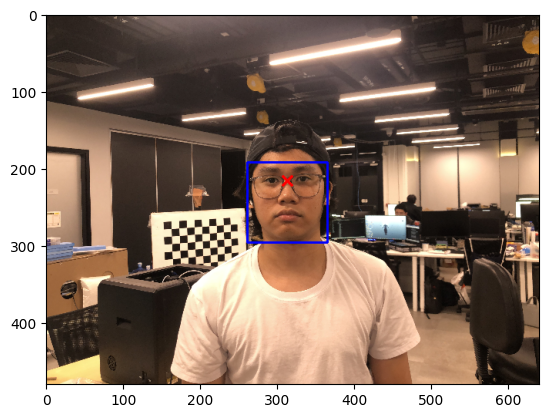

(313, 216)


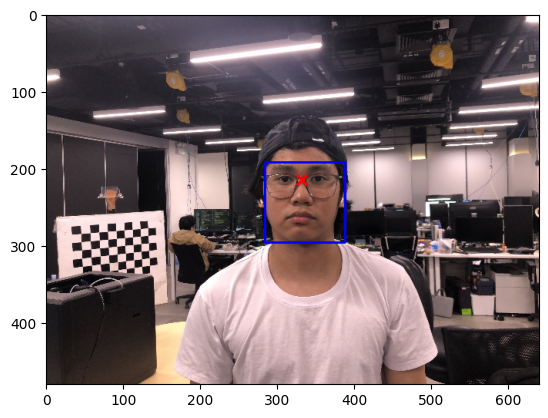

(332, 215)


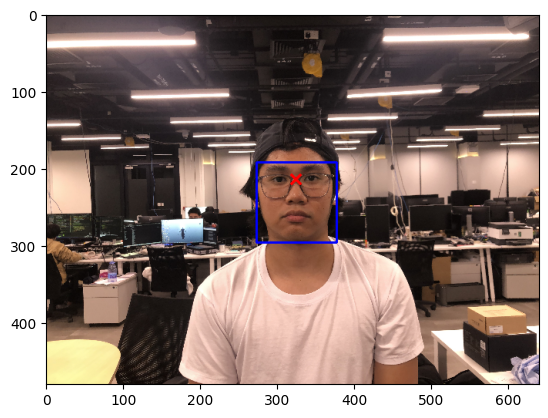

(324, 214)


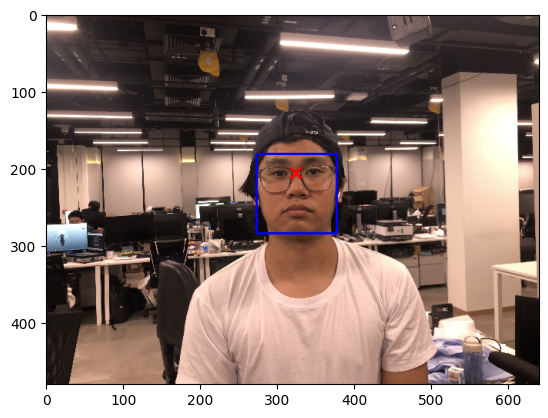

(324, 206)


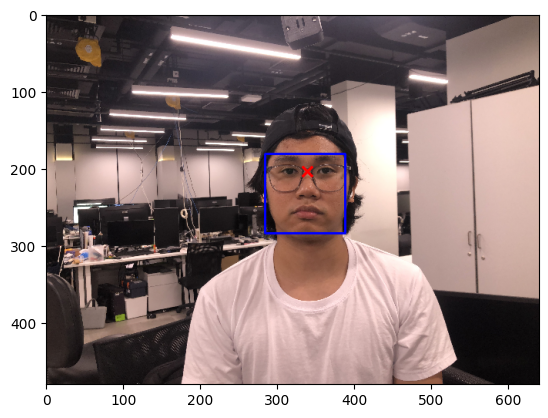

(339, 204)


In [26]:
# Check Images
for i in range(len(disp_img_list)):
    img = disp_img_list[i]
    plt.imshow(img)
    plt.show()
    print(pixel_list[i])

# DataFrame

# Analysis

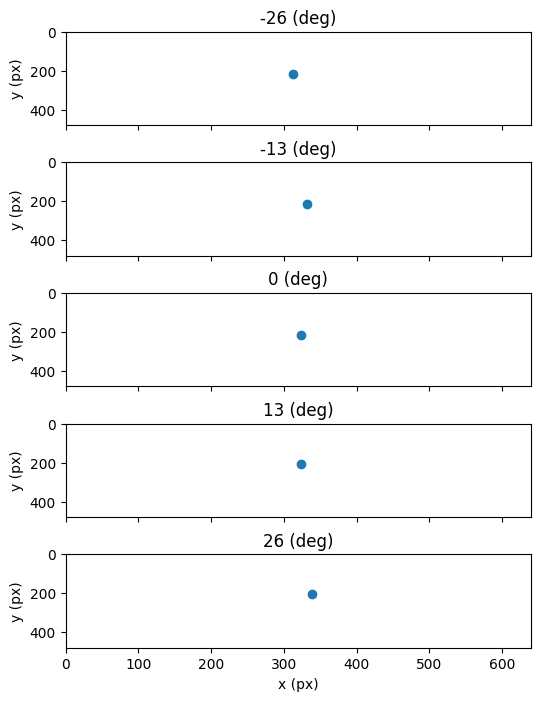

In [28]:
target_list = [-26, -13, 0, 13, 26]
color_list = ['red', 'blue', 'green']
marker_list = ['*', 'o']
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(6, 8), sharex='col', sharey='row')

for i in range(len(target_list)):
    x = pixel_list[i][0]
    y = pixel_list[i][1]
    axs[i].scatter(x,y)
    axs[i].set_xlim([0, 639])
    axs[i].set_ylim([479,0])
    axs[i].set_ylabel('y (px)')
    axs[i].set_title(str(target_list[i]) + " (deg)" )

axs[-1].set_xlabel('x (px)')
fig.subplots_adjust(hspace=0.4, wspace=1)
plt.show()